In [1]:
include("../src/ColdAtoms.jl")
using .ColdAtoms

In [2]:
using PyPlot
using QuantumOptics
using BenchmarkTools
using CSV, DataFrames

In [10]:
fontsize = 14;
linewidth = 2;
color = "red";

In [4]:
#Default simulation parameters
include("../params/default.jl")

N = 200;
samples, acc_rate = samples_generate(trap_params, atom_params, N; skip=5000, freq=1000);

Ωr = 2π * 60.0;
red_laser_params = [Ωr, wr, zr];
detuning_params = [Δ0, δ_twophoton(Ωr, Ωb, Δ0)];

T0 = T_twophoton(Ωr, Ωb, Δ0);
tspan = [0.0:T0/30:2.5*T0;];
ψ0 = g;

In [5]:
ρ_mean, ρ2_mean = 
    simulation(
        tspan, ψ0, 
        
        atom_params,
        trap_params,
        samples,
        
        f,
        red_laser_phase_amplitudes,
        blue_laser_phase_amplitudes,
        
        red_laser_params,
        blue_laser_params,
        
        detuning_params,
        decay_params;
        
        spontaneous_decay=false,
        atom_motion=false,
        laser_noise=false,
        parallel=false,
        free_motion=true
    );

In [7]:
function add_contrast(Pg, Pr, ϵ, ϵt, η)
    Pg_temp = η*(1.0 - ϵ) .+ (1.0 - η)*(1.0 - ϵ)*(Pg + ϵt * Pr);
    Pr_temp = η*ϵ .+ (1.0 - η)*(ϵ*Pg + (1.0 - ϵt + ϵ*ϵt)*Pr);
    return Pg_temp, Pr_temp
end;

ϵ, ϵt, η = 0.05, 0.05, 0.0

(0.05, 0.05, 0.0)

In [8]:
filename_rydberg = "../data/2023_10_24_N59_rydberg_tX_rez178.5.dat";
filename_rydberg1 = "../data/2023_10_24_N58_rydberg_tX_rez178.5.dat";
filename_rydberg2 = "../data/2023_10_24_N58_rydberg_tX_rez178.5_2.dat";
filename_rydberg3 = "../data/2023_10_24_N58_rydberg_tX_rez178.5_3.dat";

df_rydberg = DataFrame(CSV.File(filename_rydberg, delim=" ", header=30, ignorerepeated=true, types=Float64))
x = df_rydberg[1:end, 1];
y = df_rydberg[1:end, 4];
yerr = df_rydberg[1:end, 5];

┌ Warning: thread = 1 warning: only found 16 / 17 columns around data row: 1. Filling remaining columns with `missing`
└ @ CSV ~/.julia/packages/CSV/cwX2w/src/file.jl:586
┌ Warning: thread = 1 warning: only found 16 / 17 columns around data row: 2. Filling remaining columns with `missing`
└ @ CSV ~/.julia/packages/CSV/cwX2w/src/file.jl:586
┌ Warning: thread = 1 warning: only found 16 / 17 columns around data row: 3. Filling remaining columns with `missing`
└ @ CSV ~/.julia/packages/CSV/cwX2w/src/file.jl:586
┌ Warning: thread = 1 warning: only found 16 / 17 columns around data row: 4. Filling remaining columns with `missing`
└ @ CSV ~/.julia/packages/CSV/cwX2w/src/file.jl:586
┌ Warning: thread = 1 warning: only found 16 / 17 columns around data row: 5. Filling remaining columns with `missing`
└ @ CSV ~/.julia/packages/CSV/cwX2w/src/file.jl:586
┌ Warning: thread = 1 warning: only found 16 / 17 columns around data row: 6. Filling remaining columns with `missing`
└ @ CSV ~/.julia/packages/

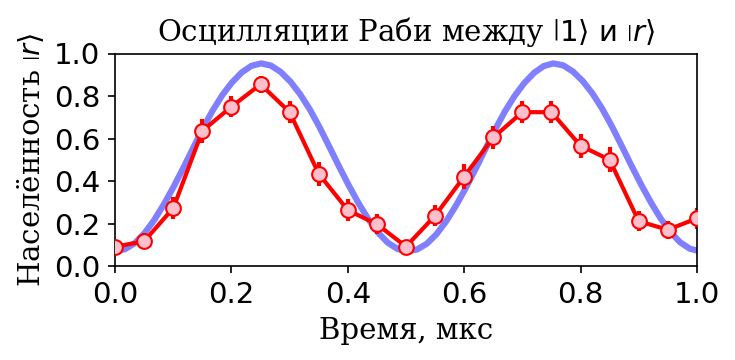

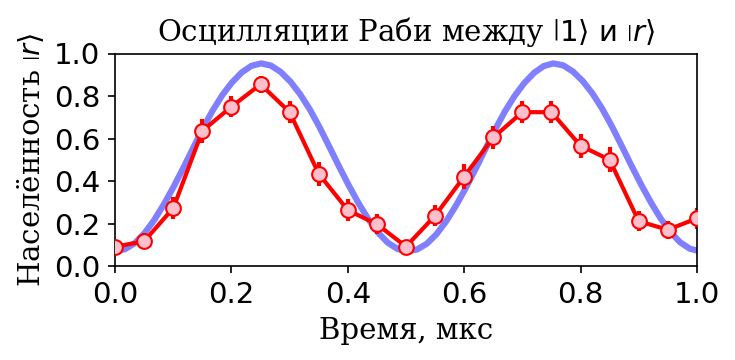

In [9]:
ϵ, ϵt, η = 0.07, 0.05, 0.0
fontsize=14;
Pg = real(expect(g ⊗ dagger(g), ρ_mean)); 
Pr = real(expect(r ⊗ dagger(r), ρ_mean));
Pg_temp, Pr_temp = add_contrast(Pg, Pr, ϵ, ϵt, η);

figure(figsize=(5,2.5), dpi=150)
plot(tspan, Pr_temp, color="blue", alpha=0.5, linewidth=3.0, label="Моделирование")
# plot(tspan, Pr, label="W/o contrast")


errorbar(x / 1000, 1.0 .- y, yerr, color="red", linewidth=2.0, alpha=1.0)
scatter(x / 1000, 1.0 .- y, color="pink", s=50, alpha=1.0,edgecolor="red", zorder=3, label="Эксперимент")
# plot(x/1000, 0.5*(1.0 .- cos.(4 * π * x/1000)))
xlim(0.0, 1.0)
ylim(0.0, 1.0)
xticks(fontsize=14)
yticks(fontsize=14)
xlabel("Время, мкс", fontsize=fontsize, fontfamily="serif")
ylabel("Населённость \$ \\left| r \\right> \$", fontsize=fontsize, fontfamily="serif")
title("Осцилляции Раби между \$ \\left| 1 \\right> \\text{ и }  \\left| r \\right> \$", fontsize=14, fontfamily="serif")
# legend()
tight_layout()
# savefig("../results/rabi.png", dpi=200, transparent=true)
# savefig("/Users/goloshch/Desktop/Materials/QOTLabs/Деловое/Отчет_23/images/rydberg.png", dpi=250)
# savefig("/Users/goloshch/Desktop/Materials/QOTLabs/Деловое/Отчет_23/images/rydberg.pdf", dpi=250)
# savefig("/Users/goloshch/Desktop/Materials/QOTLabs/Деловое/Отчет_23/images/rydberg.svg", dpi=250)

# savefig("/Users/goloshch/Desktop/Materials/QOTLabs/Деловое/Отчет_23/images/rydberg_model.png", dpi=300)
# savefig("/Users/goloshch/Desktop/Materials/QOTLabs/Деловое/Отчет_23/images/rydberg_model.pdf", dpi=300)
# savefig("/Users/goloshch/Desktop/Materials/QOTLabs/Деловое/Отчет_23/images/rydberg_model.svg", dpi=300)
gcf()

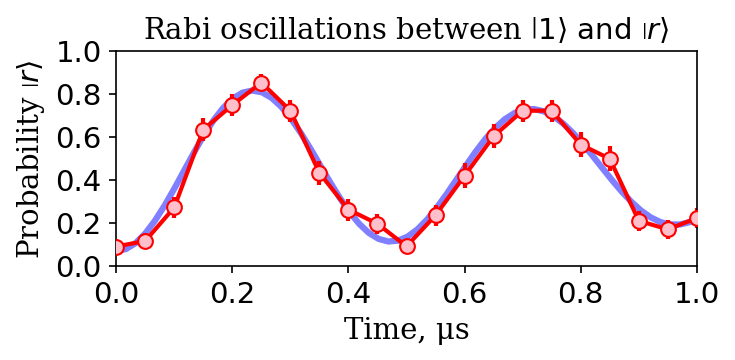

In [13]:
ϵ, ϵt, η = 0.07, 0.05, 0.0
fontsize=14;
Pg = real(expect(g ⊗ dagger(g), ρ_mean)); 
Pr = real(expect(r ⊗ dagger(r), ρ_mean));
Pg_temp, Pr_temp = add_contrast(Pg, Pr, ϵ, ϵt, η);

figure(figsize=(5,2.5), dpi=150)
plot(tspan, Pr_temp, color="blue", alpha=0.5, linewidth=3.0, label="Model")
# plot(tspan, Pr, label="W/o contrast")
errorbar(x / 1000, 1.0 .- y, yerr, color="red", linewidth=2.0, alpha=1.0)
scatter(x / 1000, 1.0 .- y, color="pink", s=50, alpha=1.0,edgecolor="red", zorder=3, label="Experiment")
# plot(x/1000, 0.5*(1.0 .- cos.(4 * π * x/1000)))
xlim(0.0, 1.0)
ylim(0.0, 1.0)
xticks(fontsize=14)
yticks(fontsize=14)
xlabel("Time, μs", fontsize=fontsize, fontfamily="serif")
ylabel("Probability \$ \\left| r \\right> \$", fontsize=fontsize, fontfamily="serif")
title("Rabi oscillations between \$ \\left| 1 \\right> \\text{ and }  \\left| r \\right> \$", fontsize=14, fontfamily="serif")
# legend()
tight_layout()
savefig("/Users/goloshch/Desktop/Materials/Workshops:Conferences/2023/ФУХА/presentation/images/rydberg_model_eng.png", dpi=200)
# gcf()

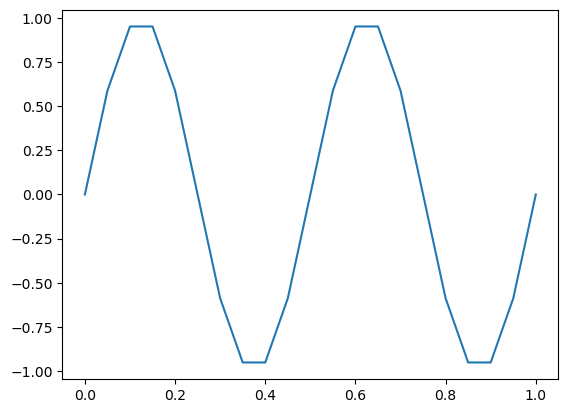

In [18]:
figure()

gcf()

In [13]:
60 * 60 /(2*904)

1.991150442477876

In [20]:
(Ωb * Ωr / (2.0 * Δ0)) / (2.0*π)

3.9823008849557517

In [14]:
#Samples
N = 100;
samples, acc_rate = samples_generate(trap_params, atom_params, N; skip=5000, freq=1000);

Ω_list = 2.0*π * [0.25, 0.5, 1.0, 2.5, 5.0, 7.5, 10.0, 12.5, 15.0, 20.0];
Ωr_list = Ωr_required(Ω_list, Ωb, Δ0); 
T_list = T_twophoton(Ωr_list, Ωb, Δ0);

In [15]:
#Results
Pg = []; 
Pr = []; 
Pg_error = [];
Pr_error = [];

#Total
for i ∈ 1:length(Ω_list)
    red_laser_params = [Ωr_list[i], wr, zr];
    δ0 = δ_twophoton(Ωr_list[i], Ωb, Δ0);
    detuning_params = [Δ0, δ0];
    
    T0 = T_twophoton(Ωr_list[i], Ωb, Δ0);
    tspan = 2.5 * T0 * [0.96:0.005:1.04;];
    pushfirst!(tspan, 0.0)

    ρ_mean, ρ2_mean = simulation(
        tspan, ψ0, 
        
        atom_params,
        trap_params,
        samples,
        
        f,
        red_laser_phase_amplitudes,
        blue_laser_phase_amplitudes,
        
        red_laser_params,
        blue_laser_params,
        
        detuning_params,
        decay_params;
        atom_motion=true,
        free_motion=true,
        laser_noise=true,
        spontaneous_decay=true,
        parallel=false
    );
    ρgg = real(expect(g ⊗ dagger(g), ρ_mean))[2:end];
    ρrr = real(expect(r ⊗ dagger(r), ρ_mean))[2:end];

    ρgg2 = real(expect(g ⊗ dagger(g), ρ2_mean))[2:end];
    ρrr2 = real(expect(r ⊗ dagger(r), ρ2_mean))[2:end];

    max_idx = argmax(ρrr);
    append!(Pg, ρgg[max_idx]);
    append!(Pr, ρrr[max_idx]);

    append!(Pg_error, sqrt(ρgg2[max_idx] - ρgg[max_idx] ^2) / sqrt(N));
    append!(Pr_error, sqrt(ρrr2[max_idx] - ρrr[max_idx] ^2) / sqrt(N));
end;

In [16]:
#Results
Pg_blue = []; 
Pr_blue = []; 
Pg_blue_error = [];
Pr_blue_error = [];

#Total
for i ∈ 1:length(Ω_list)
    red_laser_params = [Ωr_list[i], wr, zr];
    δ0 = δ_twophoton(Ωb, Ωr_list[i], Δ0);
    detuning_params = [Δ0, δ0];
    
    T0 = T_twophoton(Ωb, Ωr_list[i], Δ0);
    tspan = 2.5 * T0 * [0.96:0.005:1.04;];
    pushfirst!(tspan, 0.0)

    ρ_mean, ρ2_mean = simulation(
        tspan, ψ0, 
        
        atom_params,
        trap_params,
        samples,
        
        f,
        red_laser_phase_amplitudes,
        blue_laser_phase_amplitudes,
        
        blue_laser_params,
        red_laser_params,

        detuning_params,
        decay_params;
        atom_motion=true,
        free_motion=true,
        laser_noise=true,
        spontaneous_decay=true,
        parallel=false
    );
    ρgg = real(expect(g ⊗ dagger(g), ρ_mean))[2:end];
    ρrr = real(expect(r ⊗ dagger(r), ρ_mean))[2:end];

    ρgg2 = real(expect(g ⊗ dagger(g), ρ2_mean))[2:end];
    ρrr2 = real(expect(r ⊗ dagger(r), ρ2_mean))[2:end];

    max_idx = argmax(ρrr);
    append!(Pg_blue, ρgg[max_idx]);
    append!(Pr_blue, ρrr[max_idx]);

    append!(Pg_blue_error, sqrt(ρgg2[max_idx] - ρgg[max_idx] ^2) / sqrt(N));
    append!(Pr_blue_error, sqrt(ρrr2[max_idx] - ρrr[max_idx] ^2) / sqrt(N));
end;

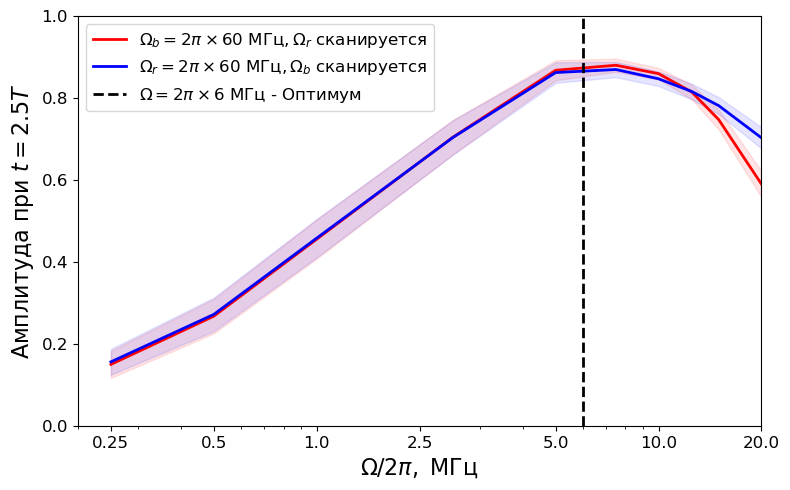

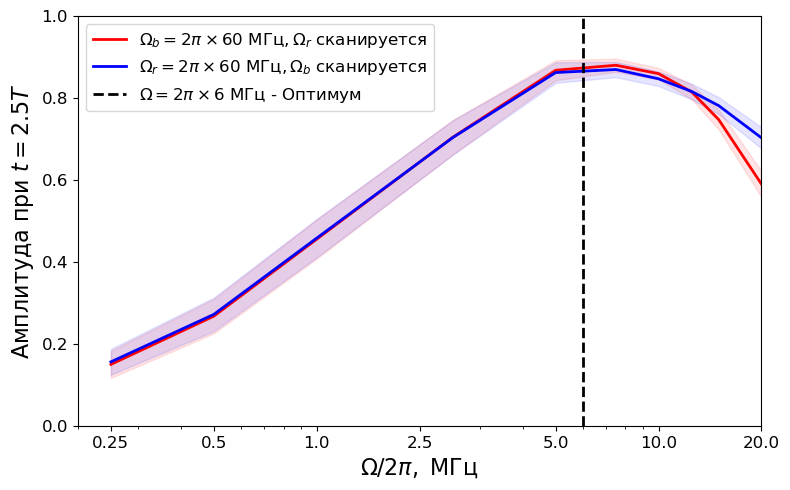

In [21]:
fontsize=16
figure(figsize=(8, 5))
plot(Ω_list / (2.0*π), Pr, linewidth=2.0, color="red", label="\$ \\Omega_b = 2π \\times 60 \\text{ МГц},  \\Omega_r \\text{ сканируется}\$")
fill_between(Ω_list / (2.0*π), Pr-Pr_error, Pr + Pr_error, color="red", alpha=0.1)

plot(Ω_list / (2.0*π), Pr_blue, linewidth=2.0, color="blue", label="\$ \\Omega_r = 2π \\times 60 \\text{ МГц},  \\Omega_b \\text{ сканируется}\$")
fill_between(Ω_list / (2.0*π), Pr_blue-Pr_blue_error, Pr_blue + Pr_blue_error, color="blue", alpha=0.1)
axvline(6.0, color="black", linestyle="--", linewidth=2, label="\$ \\Omega = 2\\pi \\times 6 \\text{ МГц - Оптимум}\$")


xscale("log")
xticks(
    ticks=[0.25, 0.5, 1.0, 2.0, 5.0, 10.0, 20.0],
    labels=[0.25, 0.5, 1.0, 2.5, 5.0, 10.0, 20.0],
    fontsize=12)
yticks(fontsize=12)

xlim(0.2, 20.0)
ylim(0.0, 1.0)

xlabel("\$ \\Omega / 2 \\pi, \\text{ МГц} \$", fontsize=fontsize)
ylabel("Амплитуда при \$ t=2.5T \$", fontsize=fontsize)
legend(fontsize=12)
tight_layout()

gcf()
# savefig("../results/optimal_rabi.pdf", dpi=250)
# savefig("../results/optimal_rabi.png", dpi=300)
# savefig("../results/optimal_rabi.jpg", dpi=250)

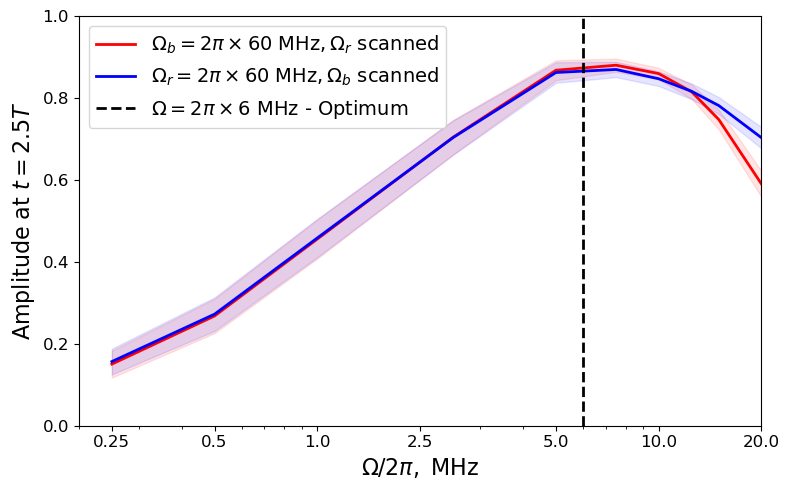

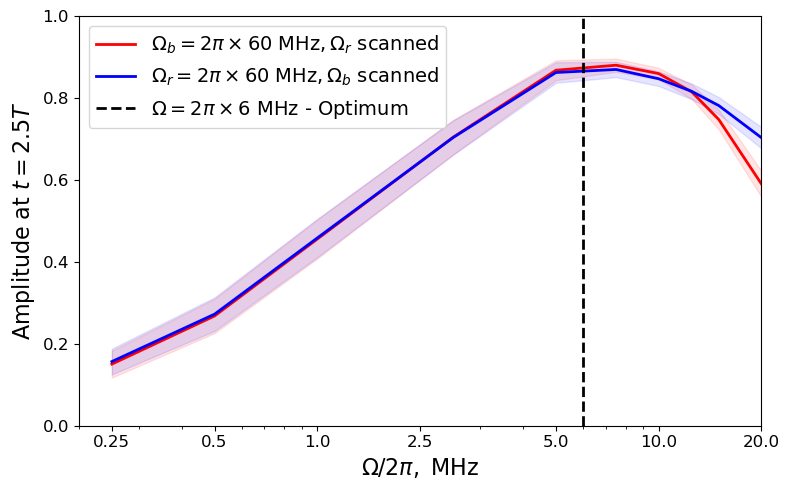

In [23]:
fontsize=16
figure(figsize=(8, 5))
plot(Ω_list / (2.0*π), Pr, linewidth=2.0, color="red", label="\$ \\Omega_b = 2π \\times 60 \\text{ MHz},  \\Omega_r \\text{ scanned}\$")
fill_between(Ω_list / (2.0*π), Pr-Pr_error, Pr + Pr_error, color="red", alpha=0.1)

plot(Ω_list / (2.0*π), Pr_blue, linewidth=2.0, color="blue", label="\$ \\Omega_r = 2π \\times 60 \\text{ MHz},  \\Omega_b \\text{ scanned}\$")
fill_between(Ω_list / (2.0*π), Pr_blue-Pr_blue_error, Pr_blue + Pr_blue_error, color="blue", alpha=0.1)
axvline(6.0, color="black", linestyle="--", linewidth=2, label="\$ \\Omega = 2\\pi \\times 6 \\text{ MHz - Optimum}\$")


xscale("log")
xticks(
    ticks=[0.25, 0.5, 1.0, 2.0, 5.0, 10.0, 20.0],
    labels=[0.25, 0.5, 1.0, 2.5, 5.0, 10.0, 20.0],
    fontsize=12)
yticks(fontsize=12)

xlim(0.2, 20.0)
ylim(0.0, 1.0)

xlabel("\$ \\Omega / 2 \\pi, \\text{ MHz} \$", fontsize=fontsize)
ylabel("Amplitude at \$ t=2.5T \$", fontsize=fontsize)
legend(fontsize=fontsize-2)
tight_layout()

savefig("/Users/goloshch/Desktop/Materials/Workshops:Conferences/2023/ФУХА/presentation/images/rydberg_optimal_eng.png", dpi=300)
gcf()

In [70]:
N = 200;
samples, acc_rate = samples_generate(trap_params, atom_params, N; skip=5000, freq=1000);

Ωr = 2π * 240.0;
red_laser_params = [Ωr, wr, zr];
detuning_params = [Δ0, δ_twophoton(Ωr, Ωb, Δ0)];

T0 = T_twophoton(Ωr, Ωb, Δ0);
tspan = [0.0:T0/30:2.5*T0;];
ψ0 = g;

In [71]:
ρ_mean, ρ2_mean = 
    simulation(
        tspan, ψ0, 
        
        atom_params,
        trap_params,
        samples,
        
        f,
        red_laser_phase_amplitudes,
        blue_laser_phase_amplitudes,
        
        red_laser_params,
        blue_laser_params,
        
        detuning_params,
        decay_params;
        parallel=false
    );

In [83]:
N = 200;
samples, acc_rate = samples_generate(trap_params, atom_params, N; skip=5000, freq=1000);

Ωr = 2π * 120.0;
red_laser_params = [Ωr, wr, zr];
detuning_params = [Δ0, δ_twophoton(Ωr, Ωb, Δ0)];

T0 = T_twophoton(Ωr, Ωb, Δ0);
tspan_120 = [0.0:T0/30:2.5*T0;];
ψ0 = g;

In [84]:
ρ_mean_120, ρ2_mean_120 = 
    simulation(
        tspan_120, ψ0, 
        
        atom_params,
        trap_params,
        samples,
        
        f,
        red_laser_phase_amplitudes,
        blue_laser_phase_amplitudes,
        
        red_laser_params,
        blue_laser_params,
        
        detuning_params,
        decay_params;
        parallel=false
    );

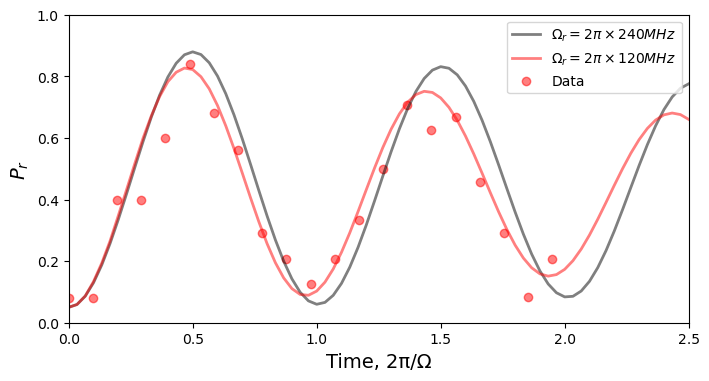

In [108]:
Pg = real(expect(g ⊗ dagger(g), ρ_mean)); 
Pr = real(expect(r ⊗ dagger(r), ρ_mean));
Pg_120 = real(expect(g ⊗ dagger(g), ρ_mean_120)); 
Pr_120 = real(expect(r ⊗ dagger(r), ρ_mean_120));

Pg_temp, Pr_temp = add_contrast(Pg, Pr, ϵ, ϵt, η);
Pg_temp_120, Pr_temp_120 = add_contrast(Pg_120, Pr_120, ϵ, ϵt, η);

figure(figsize=(8,4))
# plot(tspan / (maximum(tspan) / 2.5), Pr_temp, color="red", linewidth=2.0, alpha=0.5, label="W contrast")
plot(tspan / (maximum(tspan) / 2.5), Pr_temp, color="black", linewidth=2.0, alpha=0.5, label="\$ \\Omega_r = 2\\pi \\times 240 MHz\$")
plot(tspan_120 / (maximum(tspan_120) / 2.5), Pr_temp_120, color="red", linewidth=2.0, alpha=0.5, label="\$ \\Omega_r = 2\\pi \\times 120 MHz\$")

scatter(1.95*x / 1000, 1.0 .- y, color="red", alpha=0.5, label="Data")
# errorbar(x / 1000, y, yerr, color="red", linewidth=linewidth, alpha=0.5)
# scatter(x / 1000, y, color="red", alpha=0.5)
xlim(0.0, 2.5)
ylim(0.0, 1.0)
xlabel("Time, 2π/Ω", fontsize=fontsize)
ylabel("\$ P_r \$", fontsize=fontsize)
legend()
gcf()

# savefig("../results/rabi_120_240.pdf", dpi=250)
# savefig("../results/rabi_120_240.png", dpi=250)
# savefig("../results/rabi_120_240.jpg", dpi=250)

In [121]:
0.218 * 0.3

println((sqrt(0.4) * 50, 0.4 * 1440))
println(((sqrt(0.4) * 50 / (0.4 * 1440))^(-1), (50/1440)^(-1)))

(31.622776601683793

, 576.0)
(18.214719322569866, 28.799999999999997)


In [110]:
#Samples
N = 400;
atom_params_cold = [86.9, 25.0];
samples, acc_rate = samples_generate(trap_params, atom_params_cold, N; skip=5000, freq=1000);

Ω_list = 2.0*π * [0.2, 0.3, 0.4, 0.5, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 12.0, 14.0, 16.0, 20.0];
Ωr_list = Ωr_required(Ω_list, Ωb, Δ0); 
T_list = T_twophoton(Ωr_list, Ωb, Δ0);

In [111]:
#Results
Pg_cold = []; 
Pr_cold = []; 
Pg_cold_error = [];
Pr_cold_error = [];

#Total
for i ∈ 1:length(Ω_list)
    red_laser_params = [Ωr_list[i], wr, zr];
    δ0 = δ_twophoton(Ωr_list[i], Ωb, Δ0);
    detuning_params = [Δ0, δ0];
    
    T0 = T_twophoton(Ωr_list[i], Ωb, Δ0);
    tspan = 2.5 * T0 * [0.96:0.005:1.04;];
    pushfirst!(tspan, 0.0)

    ρ_mean, ρ2_mean = simulation(
        tspan, ψ0, 
        
        atom_params,
        trap_params,
        samples,
        
        f,
        red_laser_phase_amplitudes,
        blue_laser_phase_amplitudes,
        
        red_laser_params,
        blue_laser_params,
        
        detuning_params,
        decay_params;
        atom_motion=true,
        laser_noise=true,
        spontaneous_decay=true,
        parallel=false
    );
    ρgg = real(expect(g ⊗ dagger(g), ρ_mean))[2:end];
    ρrr = real(expect(r ⊗ dagger(r), ρ_mean))[2:end];

    ρgg2 = real(expect(g ⊗ dagger(g), ρ2_mean))[2:end];
    ρrr2 = real(expect(r ⊗ dagger(r), ρ2_mean))[2:end];

    max_idx = argmax(ρrr);
    append!(Pg_cold, ρgg[max_idx]);
    append!(Pr_cold, ρrr[max_idx]);

    append!(Pg_cold_error, sqrt(ρgg2[max_idx] - ρgg[max_idx] ^2) / sqrt(N));
    append!(Pr_cold_error, sqrt(ρrr2[max_idx] - ρrr[max_idx] ^2) / sqrt(N));
end;

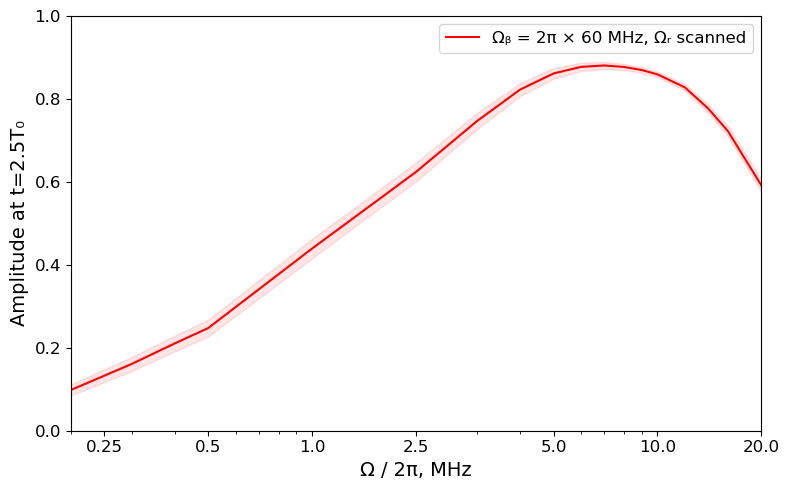

In [112]:
figure(figsize=(8, 5))
plot(Ω_list / (2.0*π), Pr_cold, linewidth=1.5, color="red", label="Ωᵦ = 2π × 60 MHz, Ωᵣ scanned")
fill_between(Ω_list / (2.0*π), Pr_cold-Pr_cold_error, Pr_cold + Pr_cold_error, color="red", alpha=0.1)

# plot(Ω_list / (2.0*π), Pr_blue, linewidth=1.5, color="blue", label="Ωᵣ = 2π × 60 MHz, Ωᵦ scanned")
# fill_between(Ω_list / (2.0*π), Pr_blue-Pr_blue_error, Pr_blue + Pr_blue_error, color="blue", alpha=0.1)
# axvline(8.5, color="black", linestyle="--", linewidth=2, label="Ω = 2π × 8 MHz - optimal")


xscale("log")
xticks(
    ticks=[0.25, 0.5, 1.0, 2.0, 5.0, 10.0, 20.0],
    labels=[0.25, 0.5, 1.0, 2.5, 5.0, 10.0, 20.0],
    fontsize=12)
yticks(fontsize=12)

xlim(0.2, 20.0)
ylim(0.0, 1.0)

xlabel("Ω / 2π, MHz", fontsize=fontsize)
ylabel("Amplitude at t=2.5T₀", fontsize=fontsize)
legend(fontsize=12)
tight_layout()

gcf()